In [11]:
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl
import matplotlib.pyplot as plt

# Generate universe variables
#   * Contaminant level and water demand on subjective ranges [0, 10]
#   * Clean water output has a range of [0, 100] in units of liters
x_contaminant = np.arange(0, 11, 1)
x_demand = np.arange(0, 11, 1)
x_clean_water = np.arange(0, 101, 1)

In [12]:
# Generate fuzzy membership functions
contaminant_low = fuzz.trimf(x_contaminant, [0, 0, 5])
contaminant_medium = fuzz.trimf(x_contaminant, [0, 5, 10])
contaminant_high = fuzz.trimf(x_contaminant, [5, 10, 10])

demand_low = fuzz.trimf(x_demand, [0, 0, 5])
demand_medium = fuzz.trimf(x_demand, [0, 5, 10])
demand_high = fuzz.trimf(x_demand, [5, 10, 10])

clean_water_low = fuzz.trimf(x_clean_water, [0, 0, 50])
clean_water_medium = fuzz.trimf(x_clean_water, [0, 50, 100])
clean_water_high = fuzz.trimf(x_clean_water, [50, 100, 100])

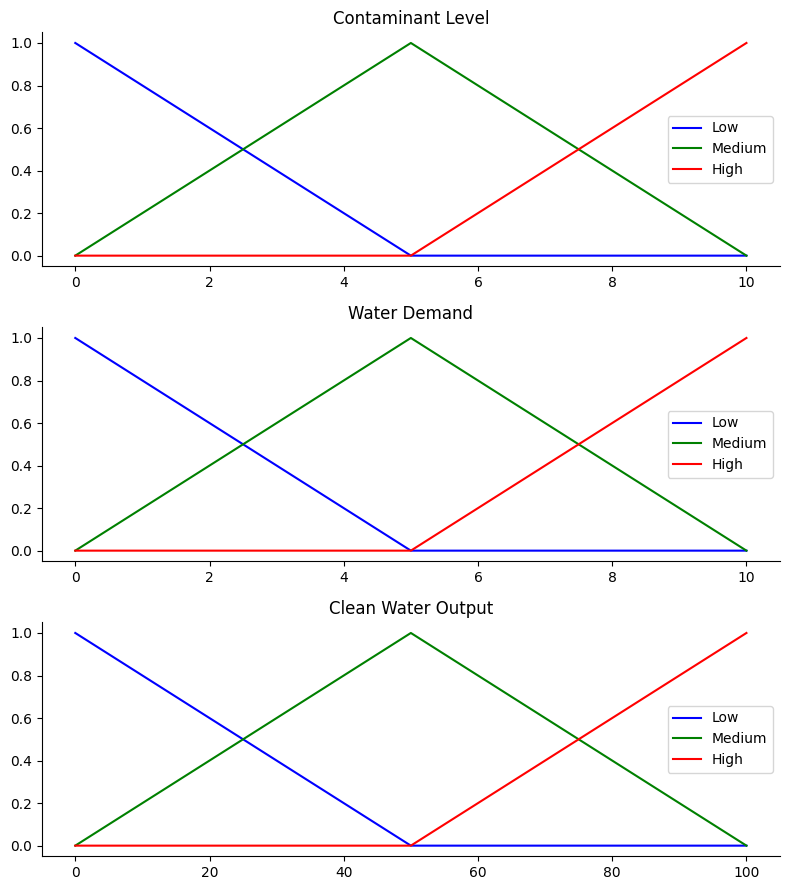

In [13]:
# Visualize these universes and membership functions
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

ax0.plot(x_contaminant, contaminant_low, 'b', linewidth=1.5, label='Low')
ax0.plot(x_contaminant, contaminant_medium, 'g', linewidth=1.5, label='Medium')
ax0.plot(x_contaminant, contaminant_high, 'r', linewidth=1.5, label='High')
ax0.set_title('Contaminant Level')
ax0.legend()

ax1.plot(x_demand, demand_low, 'b', linewidth=1.5, label='Low')
ax1.plot(x_demand, demand_medium, 'g', linewidth=1.5, label='Medium')
ax1.plot(x_demand, demand_high, 'r', linewidth=1.5, label='High')
ax1.set_title('Water Demand')
ax1.legend()

ax2.plot(x_clean_water, clean_water_low, 'b', linewidth=1.5, label='Low')
ax2.plot(x_clean_water, clean_water_medium, 'g', linewidth=1.5, label='Medium')
ax2.plot(x_clean_water, clean_water_high, 'r', linewidth=1.5, label='High')
ax2.set_title('Clean Water Output')
ax2.legend()

for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()
plt.show()

In [14]:
# Fuzzy logic system
contaminant = ctrl.Antecedent(x_contaminant, 'contaminant')
demand = ctrl.Antecedent(x_demand, 'demand')
clean_water = ctrl.Consequent(x_clean_water, 'clean_water')

# Auto-membership function population is possible with .automf(3, 5, or 7)
contaminant['low'] = contaminant_low
contaminant['medium'] = contaminant_medium
contaminant['high'] = contaminant_high

demand['low'] = demand_low
demand['medium'] = demand_medium
demand['high'] = demand_high

clean_water['low'] = clean_water_low
clean_water['medium'] = clean_water_medium
clean_water['high'] = clean_water_high

In [15]:
# Define fuzzy rules
rule1 = ctrl.Rule(contaminant['low'] & demand['low'], clean_water['low'])
rule2 = ctrl.Rule(contaminant['low'] & demand['medium'], clean_water['medium'])
rule3 = ctrl.Rule(contaminant['low'] & demand['high'], clean_water['high'])
rule4 = ctrl.Rule(contaminant['medium'] & demand['low'], clean_water['low'])
rule5 = ctrl.Rule(contaminant['medium'] & demand['medium'], clean_water['medium'])
rule6 = ctrl.Rule(contaminant['medium'] & demand['high'], clean_water['high'])
rule7 = ctrl.Rule(contaminant['high'] & demand['low'], clean_water['medium'])
rule8 = ctrl.Rule(contaminant['high'] & demand['medium'], clean_water['high'])
rule9 = ctrl.Rule(contaminant['high'] & demand['high'], clean_water['high'])

# Control system creation and simulation
clean_water_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
clean_water_sim = ctrl.ControlSystemSimulation(clean_water_ctrl)

# Function to test the system
def test_system(contaminant_level, demand_level):
    clean_water_sim.input['contaminant'] = contaminant_level
    clean_water_sim.input['demand'] = demand_level
    clean_water_sim.compute()
    output = clean_water_sim.output['clean_water']
    print(f"Contaminant: {contaminant_level}, Demand: {demand_level} -> Clean Water Output: {output:.2f} liters")
    clean_water.view(sim=clean_water_sim)

Contaminant: 1, Demand: 1 -> Clean Water Output: 32.75 liters
Contaminant: 2, Demand: 8 -> Clean Water Output: 58.78 liters
Contaminant: 5, Demand: 5 -> Clean Water Output: 50.00 liters
Contaminant: 7, Demand: 3 -> Clean Water Output: 50.00 liters
Contaminant: 9, Demand: 9 -> Clean Water Output: 67.25 liters


d:\Diskrit\sklearn-env\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


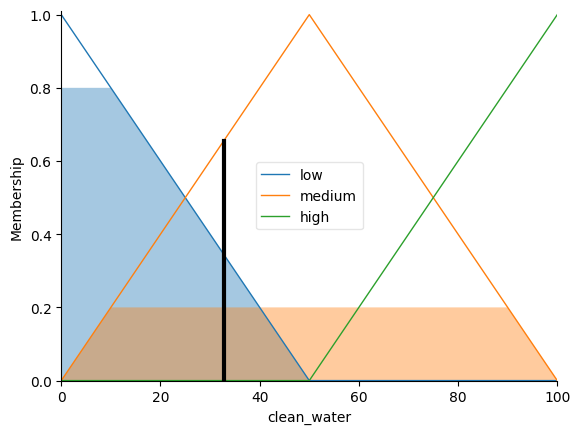

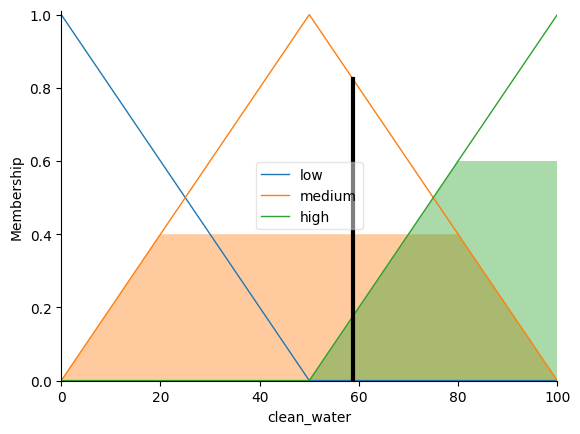

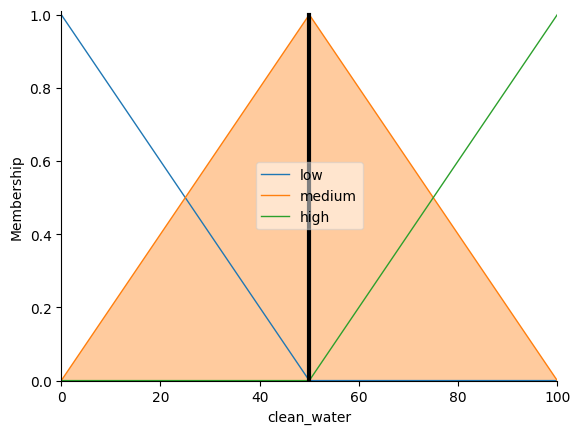

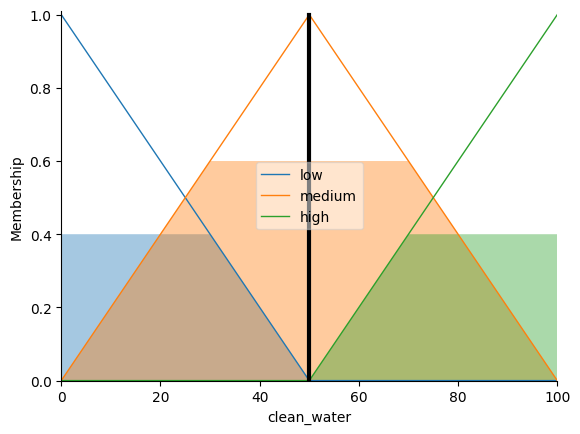

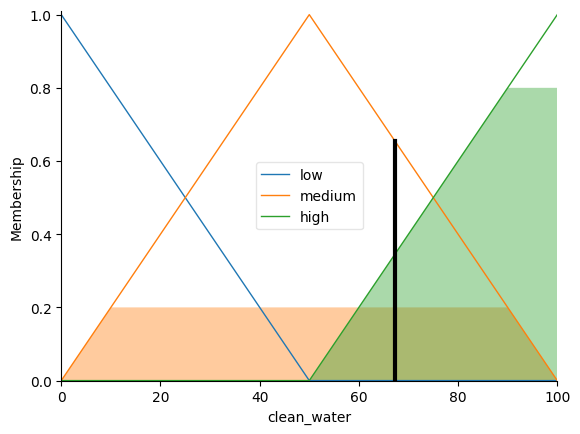

In [16]:
# Test cases
test_cases = [
    (1, 1),
    (2, 8),
    (5, 5),
    (7, 3),
    (9, 9)
]

for contaminant_level, demand_level in test_cases:
    test_system(contaminant_level, demand_level)